In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/landscape-pictures/00000098_(5).jpg
/kaggle/input/landscape-pictures/00000503.jpg
/kaggle/input/landscape-pictures/00000888.jpg
/kaggle/input/landscape-pictures/00000596_(2).jpg
/kaggle/input/landscape-pictures/00000806_(2).jpg
/kaggle/input/landscape-pictures/00000399.jpg
/kaggle/input/landscape-pictures/00000390.jpg
/kaggle/input/landscape-pictures/00000295_(4).jpg
/kaggle/input/landscape-pictures/00000151_(3).jpg
/kaggle/input/landscape-pictures/00000854_(3).jpg
/kaggle/input/landscape-pictures/00000601.jpg
/kaggle/input/landscape-pictures/00000502_(3).jpg
/kaggle/input/landscape-pictures/00000797.jpg
/kaggle/input/landscape-pictures/00000030.jpg
/kaggle/input/landscape-pictures/00000848.jpg
/kaggle/input/landscape-pictures/00000503_(2).jpg
/kaggle/input/landscape-pictures/00000567.jpg
/kaggle/input/landscape-pictures/00000494_(3).jpg
/kaggle/input/landscape-pictures/00000013_(6).jpg
/kaggle/input/landscape-pictures/00000127_(3).jpg
/kaggle/input/landscape-pictures/000

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img,array_to_img
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [14]:
BASE_DIR='/kaggle/input/landscape-pictures'

In [15]:
#Removing Image paths
image_paths=[]
for image_name in os.listdir(BASE_DIR):
    image_path=os.path.join(BASE_DIR,image_name)
    image_paths.append(image_path)

In [7]:
len(image_paths)

4319

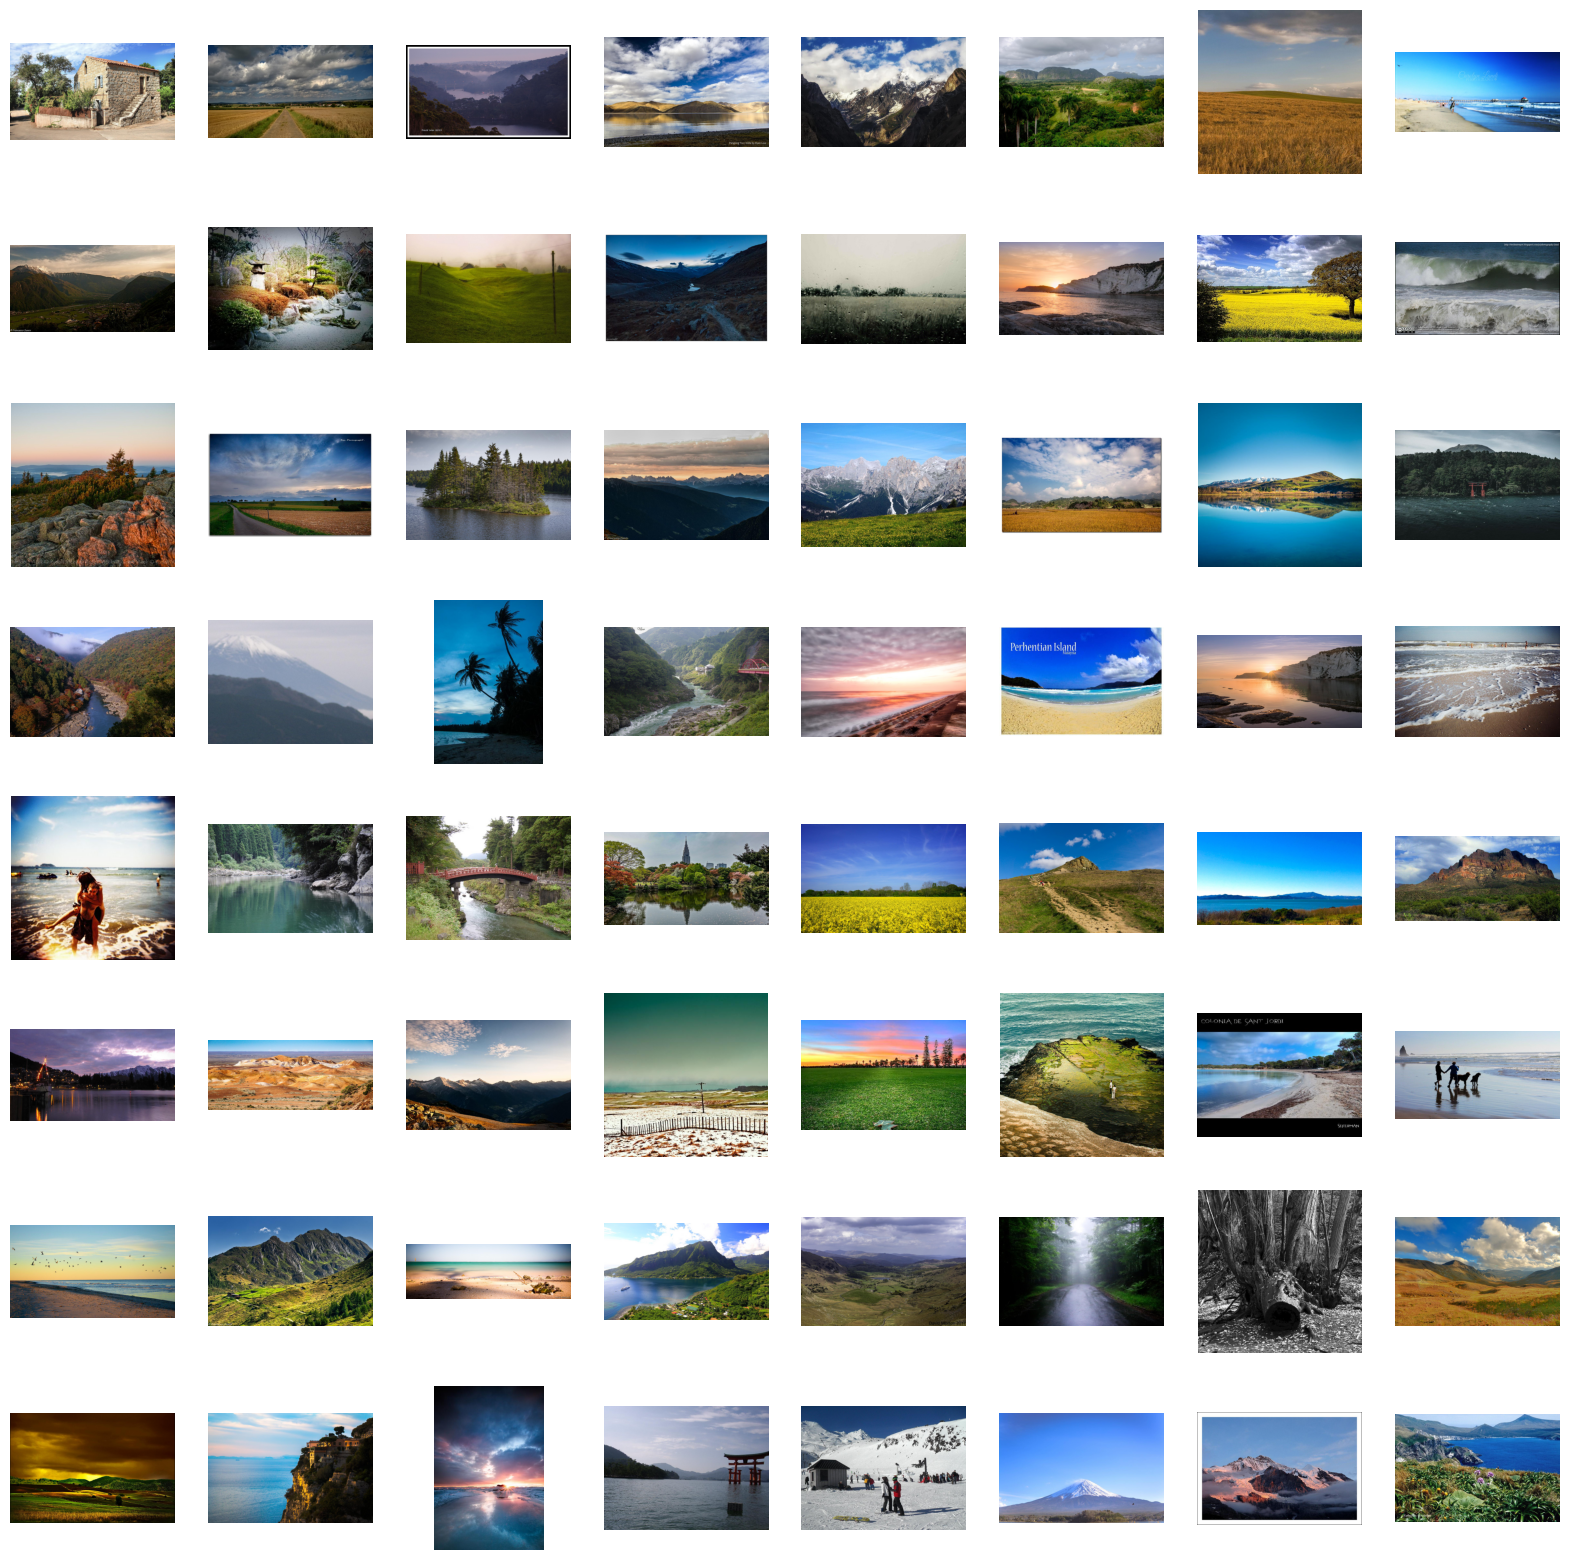

In [16]:
#display
plt.figure(figsize=(20,20))
temp_images=image_paths[:64]
index=1

for image_path in temp_images:
    plt.subplot(8,8,index)
    img=load_img(image_path)
    img=np.array(img)
    plt.imshow(img)
    plt.axis('off')
    index=index+1

In [27]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

IMAGE_SIZE = (64, 64)  # Set a fixed size

train_images = []
for path in tqdm(image_paths):
    img = load_img(path, target_size=IMAGE_SIZE)  # Resize images
    img = img_to_array(img)  # Convert to NumPy array
    train_images.append(img)



  0%|          | 0/4319 [00:00<?, ?it/s]

In [26]:
train_images[0].shape

(64, 64, 3)

In [ ]:
train_images=(train_images-127.5)/127.5
#normalisation

In [ ]:
train_images[0]

In [28]:
#generator
LATENT_DIM=100#latent dimension for random noise
WEIGHT_INIT=keras.initializers.RandomNormal(mean=0.0,stddev=0.02)
#no.of channels
CHANNELS=3


In [31]:
#generator model creates new image from training data from noise
model=Sequential(name="generator")
model.add(layers.Dense(8*8*512,input_dim=LATENT_DIM))#creating noise which is 1d
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

model.add(layers.Reshape((8,8,512)))#1d to 3d

#upsmple to 16*16
model.add(layers.Conv2DTranspose(256,(4,4),strides=(2,2),padding="same",kernel_initializer=WEIGHT_INIT))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

#upsmple to 32*32
model.add(layers.Conv2DTranspose(128,(4,4),strides=(2,2),padding="same",kernel_initializer=WEIGHT_INIT))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())

model.add(layers.Conv2DTranspose(64,(4,4),strides=(2,2),padding="same",kernel_initializer=WEIGHT_INIT))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())


model.add(layers.Conv2D(CHANNELS,(4,4),padding="same",activation="tanh"))

generator=model
generator.summary()

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 32768)               │       3,309,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32768)               │         131,072 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 16, 16, 256)         │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 32, 32, 128)         │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 64, 64, 64)          │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 3)           │           3,075 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,198,467 (23.65 MB)

 Trainable params: 6,132,035 (23.39 MB)

 Non-trainable params: 66,432 (259.50 KB)

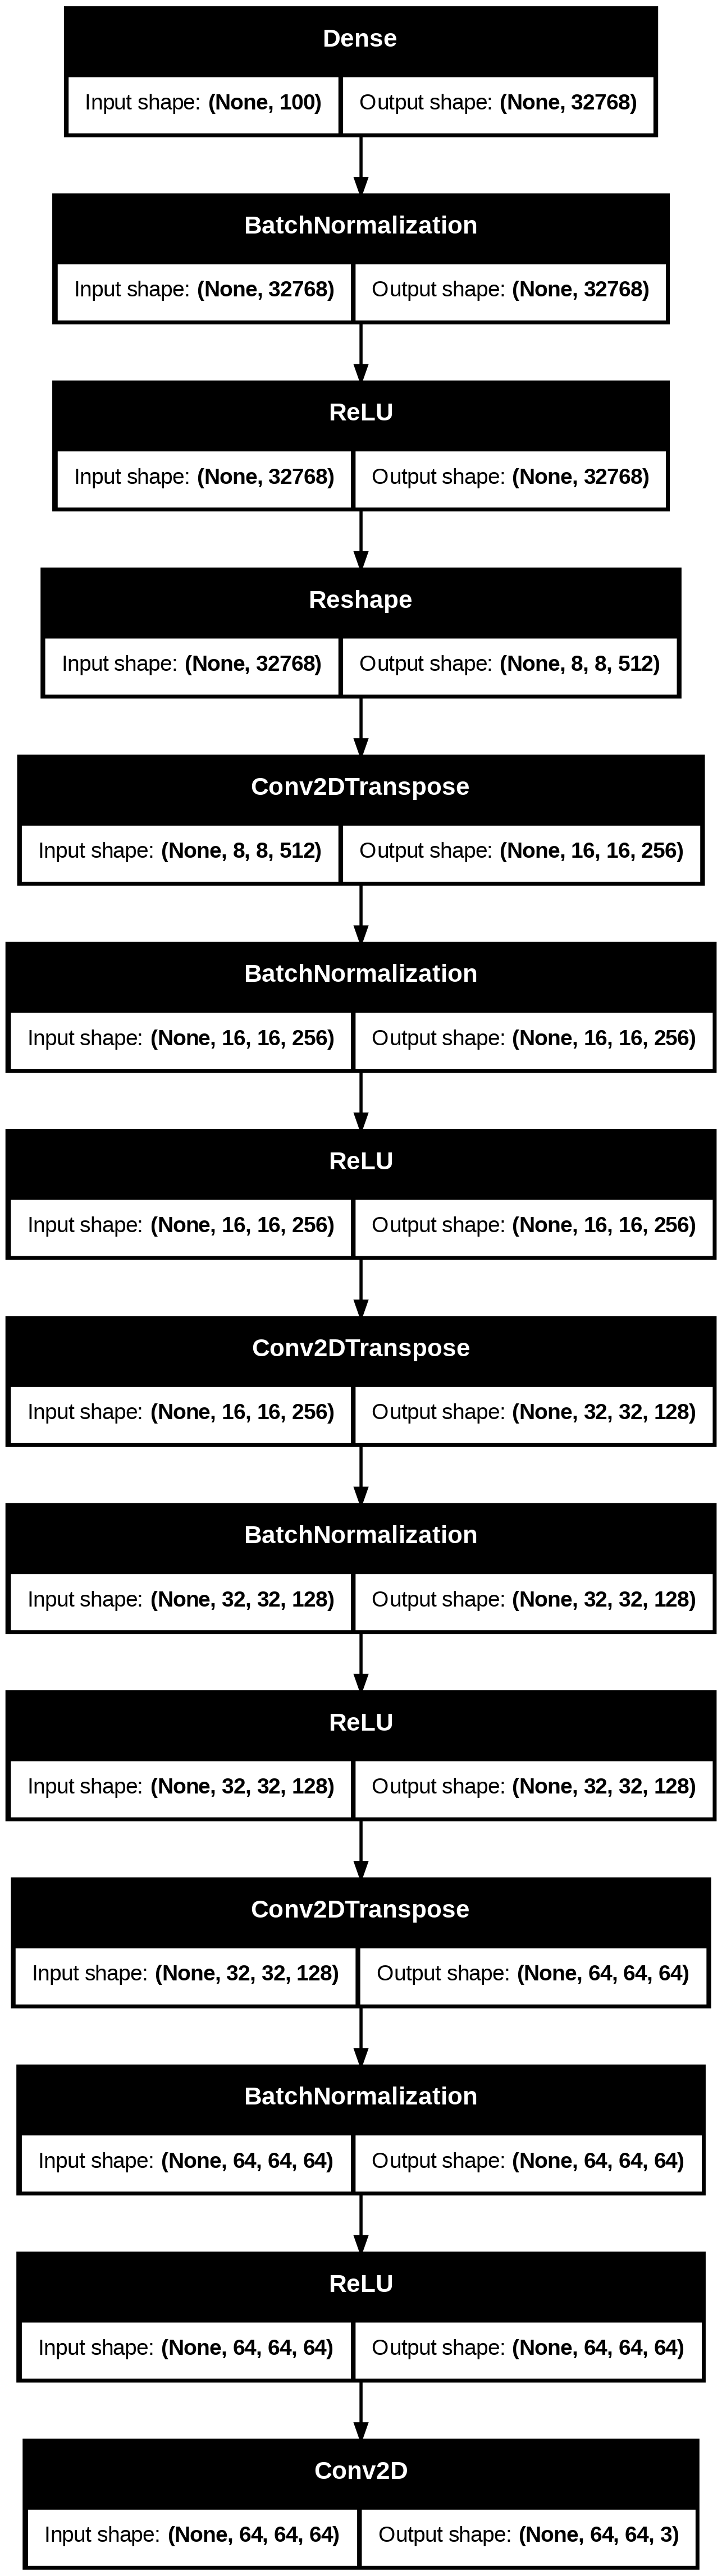

In [33]:
from tensorflow.keras.utils import plot_model

plot_model(generator,show_shapes=True)

In [34]:
#discriminator checks if real or fake
#we train the generator model until we have fooled the discriminator
model=Sequential(name="discriminator")
input_shape=(64,64,3)
alpha=0.2

model.add(layers.Conv2D(64,(4,4),strides=(2,2),padding="same",input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=alpha))

model.add(layers.Conv2D(128,(4,4),strides=(2,2),padding="same",input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=alpha))

model.add(layers.Conv2D(128,(4,4),strides=(2,2),padding="same",input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU(alpha=alpha))

model.add(layers.Flatten())
model.add(layers.Dropout(0.3))

model.add(layers.Dense(1,activation="sigmoid"))

discriminator=model
discriminator.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │           8,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,081 (1.55 MB)

 Trainable params: 405,441 (1.55 MB)

 Non-trainable params: 640 (2.50 KB)